# Lesson 7a: Data Exploration

In this lesson, we will look at the necessary steps required before any machine learning takes place, which involves:

* loading the data;
* looking at the variables in the dataset, in particular, differentiate
  between numerical and categorical variables, which need different
  preprocessing in most machine learning workflows;
* visualizing the distribution of the variables to gain some insights into
  the dataset.

Although this stage can take significant time, this notebook will just provide a small sampling of considerations we should make prior to modeling.

## Learning objectives

By the end of this lesson you'll be able to:

* Differentiate between numerical and categorical variables within your dataset.
* Perform visual inspection of your variables and their distributions.

## Loading the adult census dataset

We will use data from the 1994 US census that we downloaded from
[OpenML](http://openml.org/).

You can look at the OpenML webpage to learn more about this dataset:
<http://www.openml.org/d/1590>

The dataset is available as a CSV (Comma-Separated Values) file and we will
use pandas to read it.

In [2]:
import pandas as pd

adult_census = pd.read_csv("../data/adult-census.csv")

```{note}
The goal with this data is to predict whether a person earns over 50K a year
based on heterogeneous data such as age, employment, education, family
information, etc.
```

## Response variable

The column named `class` is our target variable (i.e., the variable which we want to predict). 

The two possible classes are <=50K (low-revenue) and >50K (high-revenue). 

Consequently, this is called a _binary classification_ problem.

In [3]:
target_column = 'class'
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

```{note}
Classes are slightly imbalanced, meaning there are more samples of one or
more classes compared to others. Class imbalance happens often in practice
and may need special techniques when building a predictive model.
```

## Features

The other columns represent pieces of information (aka "features") that may be useful in predicting the response variable.

In the field of machine learning and descriptive
statistics, commonly used equivalent terms are "variable", "attribute", or
"covariate".

In [4]:
features = adult_census.drop(columns='class')
features.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [5]:
import numpy as np

numeric_columns = features.select_dtypes(include=np.number).columns.values
categorical_columns = features.drop(columns=numeric_columns).columns.values

print(f'''
There are {features.shape[0]} observations and {features.shape[1]} features.

Numeric features: {', '.join(numeric_columns)}.

Categorical features: {', '.join(categorical_columns)}.
''')


There are 48842 observations and 13 features.

Numeric features: age, education-num, capital-gain, capital-loss, hours-per-week.

Categorical features: workclass, education, marital-status, occupation, relationship, race, sex, native-country.



## Visual inspection of the data

Before building a predictive model, it is a good idea to look at the data:

* maybe the task you are trying to achieve can be solved without machine
  learning;
* you need to check that the information you need for your task is actually
  present in the dataset;
* inspecting the data is a good way to find peculiarities. These can
  arise during data collection (for example, malfunctioning sensor or missing
  values), or from the way the data is processed afterwards (for example
  capped values);
* we may identify feature engineering tasks that could improve modeling performance.

Let’s look at the distribution of individual features, to get some insights about the data. We can start by plotting histograms, note that this only works for features containing numerical values:

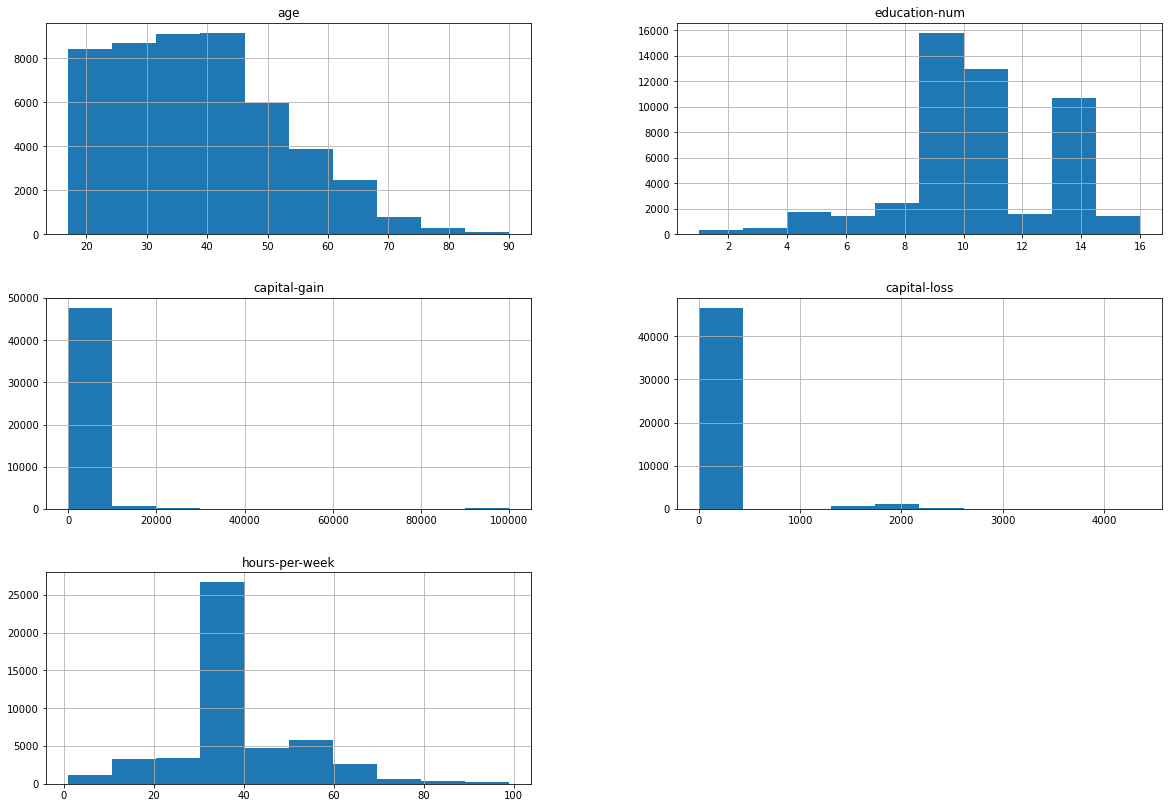

In [6]:
adult_census.hist(figsize=(20, 14));

We can already make a few comments about some of the variables:

* `age`: there are not that many points for `age > 70`. The dataset
  description does indicate that retired people have been filtered out
  (`hours-per-week > 0`);
* `education-num`: peak at 10 and 13, hard to tell what it corresponds to
  without looking much further. We'll do that later in this notebook;
* `hours-per-week` peaks at 40, this was very likely the standard number of
  working hours at the time of the data collection;
* most values of `capital-gain` and `capital-loss` are close to zero.

For categorical variables, we can look at the distribution of values:

In [7]:
adult_census['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

Note that there is an important imbalance on the data collection concerning the number of male/female samples. Be aware that any kind of data imbalance will impact the generalizability of a model trained on it. Moreover, it can lead to [fairness](https://docs.microsoft.com/en-us/azure/machine-learning/concept-fairness-ml#what-is-machine-learning-fairness) problems if used naively when deploying a real life setting.

We recommend our readers to refer to [fairlearn.org](https://fairlearn.org/) for resources on how to quantify and potentially mitigate fairness issues related to the deployment of automated decision making systems that relying on machine learning components.

In [8]:
adult_census['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

```{admonition} Question:
:class: attention
What do you think the difference is between `education` and `education-num`?
```

Let’s look at the relationship between `education` and `education-num`.

In [9]:
pd.crosstab(
    index=adult_census['education'],
    columns=adult_census['education-num']
)

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


This shows that `education` and `education-num` give you the same
information. For example, `education-num=2` is equivalent to
`education='1st-4th'`. In practice that means we can remove `education-num`
without losing information. 

```{note}
Having redundant (or highly correlated) columns can be a problem for machine learning algorithms. In the upcoming notebooks, we will only keep the `education` variable, excluding the `education-num` variable since the latter is redundant with the former.
```

We can measure the actual correlation across our numeric features using the `.corr()` method. Highly correlated variables is something to keep an eye on as they can cause problems in certain machine learning algorithms. However, in this data the numeric features have low correlation.

In [14]:
corr = adult_census[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,0.030940,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.143689,0.082157,0.054467,1.000000


Another way to inspect the data is to do a `pairplot` and show how each
variable differs according to our target, i.e. `class`. Plots along the
diagonal show the distribution of individual variables for each `class`. The
plots on the off-diagonal can reveal interesting interactions between
variables.

In [ ]:
import seaborn as sns

# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
             hue=target_column, plot_kws={'alpha': 0.2},
             height=3, diag_kind='hist', diag_kws={'bins': 30});

## Creating decision rules by hand

By looking at the previous plots, we could create some hand-written rules
that predicts whether someone has a high- or low-income. 

```{admonition} Question:
:class: attention
Looking at the prior pairplot, what type of decision rules would you suggest?
```

For instance, we could focus on the combination of the `hours-per-week` and `age` features.

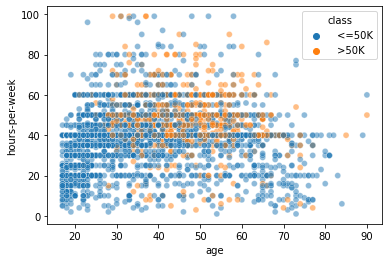

In [18]:
sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
);

The data points (circles) show the distribution of `hours-per-week` and `age` in the dataset. Blue points mean low-income and orange points mean high-income. This part of the plot is the same as the bottom-left plot in the pairplot above.

In this plot, we can try to find regions that mainly contains a single class such that we can easily decide what class one should predict. We could come up with hand-written rules as shown in this plot:

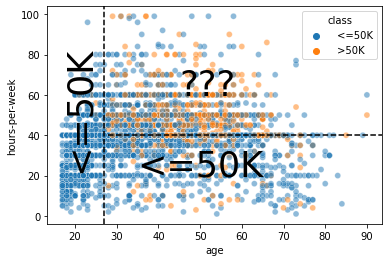

In [10]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age", y="hours-per-week", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
plt.annotate("???", (45, 60), fontsize=35);

* In the region `age < 27` (left region) the prediction is low-income.
  Indeed, there are many blue points and we cannot see any orange points.
* In the region `age > 27 AND hours-per-week < 40`
  (bottom-right region), the prediction is low-income. Indeed, there are
  many blue points and only a few orange points.
* In the region `age > 27 AND hours-per-week > 40` (top-right region),
  we see a mix of blue points and orange points. It seems complicated to
  chose which class we should predict in this region.

## Unbiased decision rules

It is interesting to note that some machine learning models (i.e. decision trees) will work similarly to what we did. However, ML models chose the "best" decision rules based on the data without human intervention or inspection. 

ML models are extremely helpful when creating rules by hand is not straightforward, for example because we are in high dimension (many
features) or because there are no simple and obvious rules that separate the two classes as in the top-right region of the previous plot.

To sum up, the important thing to remember is that in a machine-learning setting, a model automatically creates the "rules" from the data in order to
make predictions on new unseen data. **And this is where we'll turn our attention to in future lessons.**

## Exercises

```{admonition} Questions:
Using the **ames_clean.csv** data:

1. Assess the distribution of the response variable (`SalePrice`)
2. How many features are numeric vs. categorical?
3. Pick a numeric feature that you believe would be influential on a home's `SalePrice`. Assess the distribution of the numeric feature. Assess the relationship between that feature and the `SalePrice`.
4. Pick a categorical feature that you believe would be influential on a home's `SalePrice`. Assess the distribution of the categorical feature. Assess the relationship between that feature and the `SalePrice`.
```

## Computing environment

In [15]:
%load_ext watermark
%watermark -v -p jupyterlab,pandas,numpy,seaborn,matplotlib

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

jupyterlab: 3.3.2
pandas    : 1.4.2
numpy     : 1.21.5
seaborn   : 0.11.2
matplotlib: 3.5.1

